In [1]:
import pandas as pd #MATRIX COMPUTATION
import numpy as np #LINEAR ALGEBRA COMPUTATION
import seaborn as sns



In [2]:
train = pd.read_csv('nyc_airbnb.csv')

In [3]:
train.head(n = 10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
test_list = train['neighbourhood_group']

res=[]

for i in test_list: 
    if i not in res: 
        res.append(i) 
        
test_list

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

In [5]:
res

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

Text(0.5, 1.0, 'Longitude-Latitude of the five neighbourhood groups')

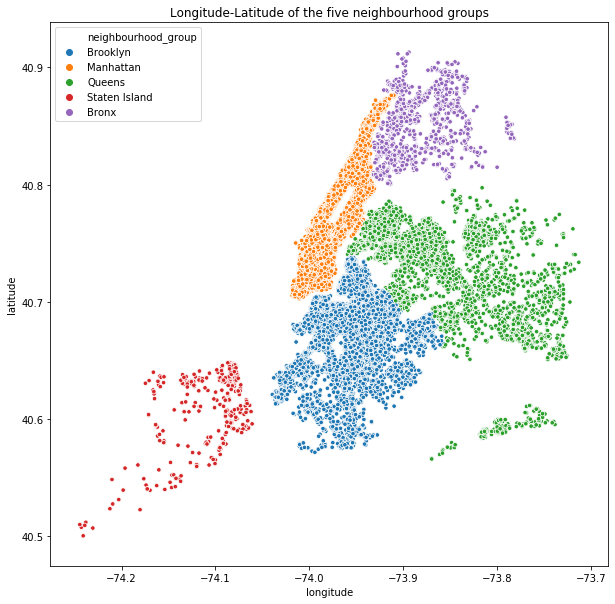

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=train)

plt.title('Longitude-Latitude of the five neighbourhood groups')

#the below visual is a clear visualisation of the five NYC's popular neighbourhoods

In [7]:
unwanted_coloumns = ['latitude', 'longitude', 'id', 'host_id', 'reviews_per_month', 'last_review', 'calculated_host_listings_count', 'name', 'host_name']

train = train.drop(unwanted_coloumns, axis = 1, inplace = False)

train.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,355
2,Manhattan,Harlem,Private room,150,3,0,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

#sns.catplot(x = "neighbourhood_group", data = train, hue = "price", kind = "count")
#sns.factorplot(data = train, x = "neighbourhood_group", y = "price")
#sns.catplot( x = "neighbourhood_group", y = "price", hue="price", data=train)


Text(0.5, 1.0, 'Price of neighbourhood groups')

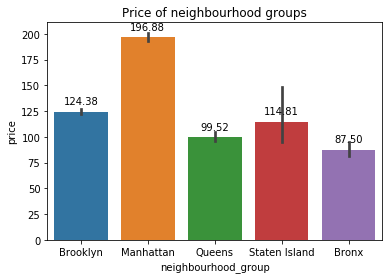

In [9]:
from numpy import median

splot = sns.barplot(x="neighbourhood_group", y="price", data=train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Price of neighbourhood groups')

Text(0.5, 1.0, 'Minimum nights of neighbourhood groups')

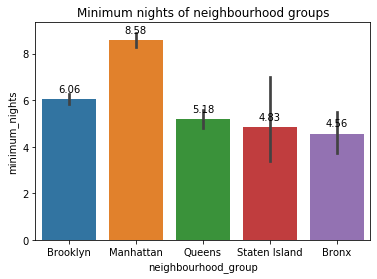

In [10]:
splot = sns.barplot(x="neighbourhood_group", y="minimum_nights", data=train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Minimum nights of neighbourhood groups')

Text(0.5, 1.0, 'Fare range of different neighbourhood groups')

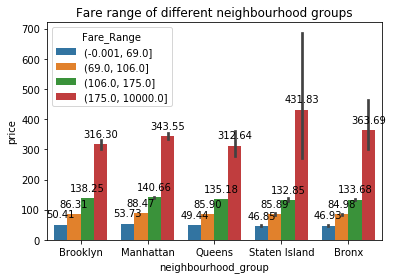

In [11]:
train['Fare_Range'] = pd.qcut(train['price'], 4) 
splot = sns.barplot(x = 'neighbourhood_group', hue ='Fare_Range', y ='price', data = train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Fare range of different neighbourhood groups')

Text(0.5, 1.0, 'Room type of neighbourhood groups vs Price')

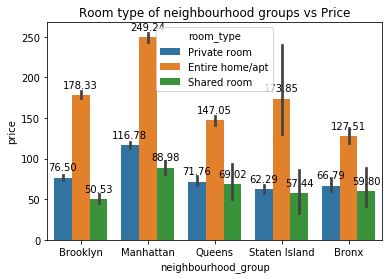

In [12]:
splot = sns.barplot(x = 'neighbourhood_group', hue ='room_type', y ='price', data = train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Room type of neighbourhood groups vs Price')

Text(0.5, 1.0, 'Room type of neighbourhood groups vs Minimum nights')

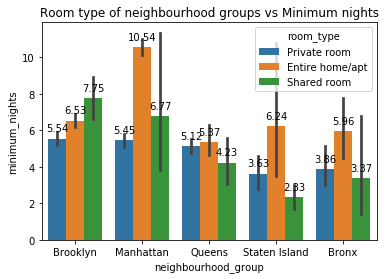

In [13]:
splot = sns.barplot(x = 'neighbourhood_group', hue ='room_type', y ='minimum_nights', data = train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Room type of neighbourhood groups vs Minimum nights')

Text(0.5, 1.0, 'Room type vs Price')

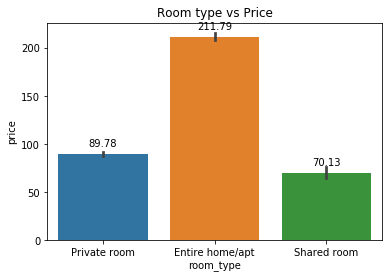

In [14]:
from numpy import median

splot = sns.barplot(x="room_type", y="price", data=train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Room type vs Price')

Text(0.5, 1.0, 'Room type vs 365 Day room availability')

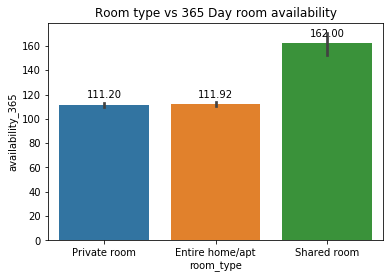

In [15]:
splot = sns.barplot(x="room_type", y="availability_365", data=train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Room type vs 365 Day room availability')

Text(0.5, 1.0, 'Room type vs Number of reviews')

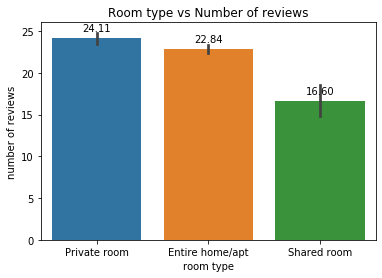

In [16]:
splot = sns.barplot(x="room_type", y="number_of_reviews", data=train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('room type')
plt.ylabel('number of reviews')
plt.title('Room type vs Number of reviews')

In [17]:
train.isnull().sum() #no missing values

neighbourhood_group    0
neighbourhood          0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
availability_365       0
Fare_Range             0
dtype: int64

Text(0.5, 1.0, 'Room types vs Price')

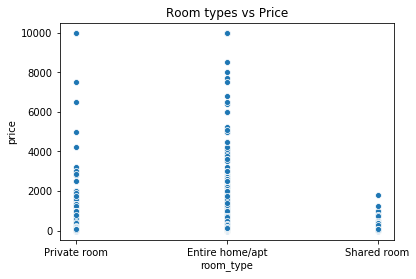

In [18]:
#let's see how scatterplot will come out 
sns.scatterplot(x='room_type', y='price', data=train)
plt.title('Room types vs Price')


Text(0.5, 1.0, 'Neighbourhood groups vs Room-type availability')

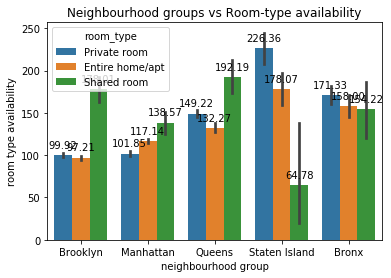

In [19]:
splot = sns.barplot(x = 'neighbourhood_group', hue ='room_type', y ='availability_365', data = train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('neighbourhood group')
plt.ylabel('room type availability')
plt.title('Neighbourhood groups vs Room-type availability')

Text(0, 0.5, 'Frequency')

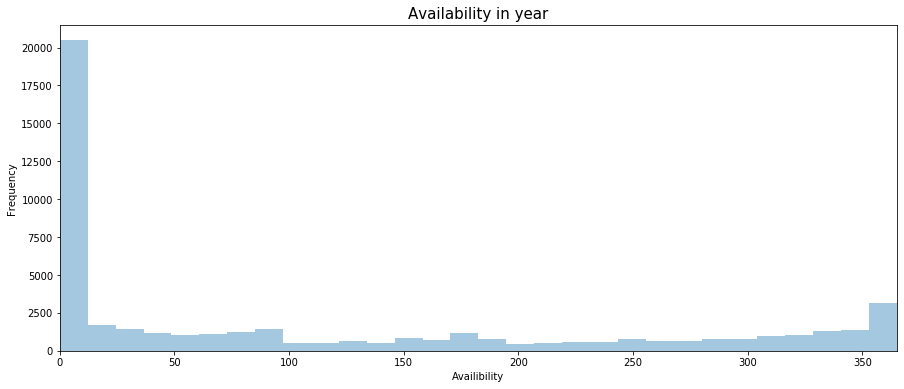

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.distplot(train.availability_365, kde=False)
plt.xlim(0,365)
plt.title('Availability in year', fontsize=15)
plt.xlabel('Availibility')
plt.ylabel("Frequency")


Text(0.5, 1.0, 'Neighbourhood groups vs 365-Day Room availability')

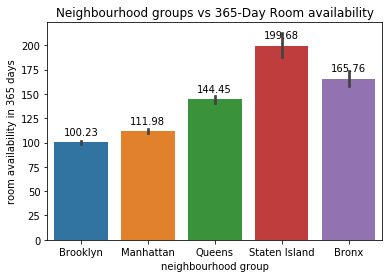

In [21]:
splot = sns.barplot(x="neighbourhood_group", y="availability_365", data=train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('neighbourhood group')
plt.ylabel('room availability in 365 days')
plt.title('Neighbourhood groups vs 365-Day Room availability')

In [22]:
train.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365,Fare_Range
0,Brooklyn,Kensington,Private room,149,1,9,365,"(106.0, 175.0]"
1,Manhattan,Midtown,Entire home/apt,225,1,45,355,"(175.0, 10000.0]"
2,Manhattan,Harlem,Private room,150,3,0,365,"(106.0, 175.0]"
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194,"(69.0, 106.0]"
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0,"(69.0, 106.0]"


Text(0.5, 1.0, 'Neighbourhood groups vs Total count')

<Figure size 432x288 with 0 Axes>

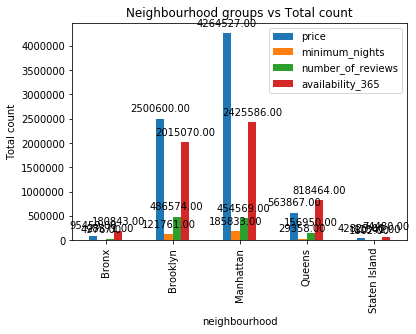

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt



plt.clf()
splot = train.groupby('neighbourhood_group').sum().plot(kind='bar')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('neighbourhood')
plt.ylabel('Total count')
plt.title('Neighbourhood groups vs Total count')

#we can see here that Manhattan generates the most revenue out of all neighbourhoods of $42.65M

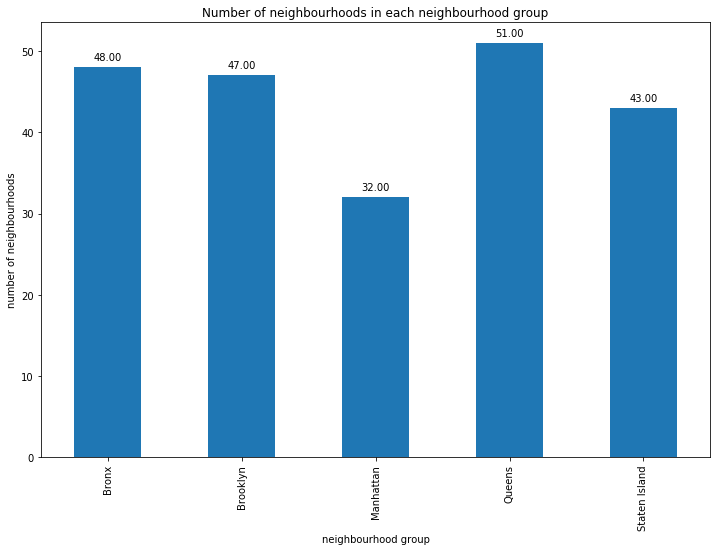

In [24]:

magic = train.groupby('neighbourhood_group')['neighbourhood'].agg(','.join).reset_index()
magic

fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)

splot = train.groupby('neighbourhood_group')['neighbourhood'].nunique().plot(kind='bar', ax = ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('neighbourhood group')
plt.ylabel('number of neighbourhoods')
plt.title('Number of neighbourhoods in each neighbourhood group')
plt.show()


#splot = sns.barplot(x = 'neighbourhood', y = 'neighbourhood', data = magic)



Text(0.5, 1.0, 'Neighbourhood group rooms vs Number of reviews')

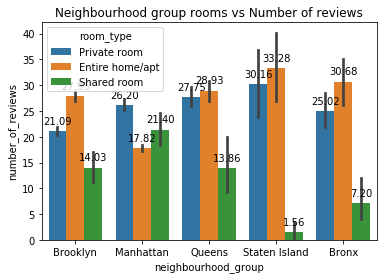

In [25]:
splot = sns.barplot(x = 'neighbourhood_group', hue ='room_type', y ='number_of_reviews', data = train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Neighbourhood group rooms vs Number of reviews')

In [26]:
df = train['neighbourhood'].groupby(train['neighbourhood_group']).sum()
df

res=[]

for i in df: 
    if i not in res: 
        res.append(i) 
        
res

#list of all neighbourhoods, the output below doesnt have spaces and commas as the data has been directly extracted from excel without any formatting.

['HighbridgeHighbridgeClason PointEastchesterKingsbridgeWoodlawnUniversity HeightsAllertonConcourse VillageConcourseKingsbridgeWakefieldSpuyten DuyvilMott HavenLongwoodAllertonMorris HeightsConcourseAllertonAllertonAllertonPort MorrisFieldstonMount EdenCity IslandConcoursePort MorrisMott HavenKingsbridgePort MorrisWilliamsbridgeSoundviewMount EdenCo-op CityParkchesterCity IslandPort MorrisNorth RiverdaleBronxdaleLongwoodKingsbridgeRiverdaleKingsbridgeSoundviewNorwoodConcourseCo-op CityClaremont VillagePort MorrisFordhamPort MorrisUniversity HeightsConcourse VillageWilliamsbridgeFieldstonMott HavenAllertonAllertonMott HavenMott HavenConcourseConcourse VillageWakefieldMount HopeMott HavenMott HavenFieldstonLongwoodMott HavenClason PointClason PointNorwoodUniversity HeightsConcourse VillageEastchesterEastchesterNorwoodKingsbridgeClason PointKingsbridgeAllertonConcourseKingsbridgeAllertonVan NestWilliamsbridgeConcourseConcourse VillageHighbridgeClason PointWilliamsbridgeMount HopeEastchest